In [9]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/machineHack/Workation Price Prediction Challenge/Participant_Data_WPPH.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('finish')


finish


In [153]:
import numpy as np
import pandas as pd

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [154]:
train=pd.read_csv("/content/Participant_Data_WPPH/Train.csv")
test=pd.read_csv("/content/Participant_Data_WPPH/Test.csv")
sub=pd.read_csv("/content/Participant_Data_WPPH/sample submission.csv")

In [155]:
train[:5]

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,08-12-2021,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5
2,f060f2954840503cc2fdaf495357b7df,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,26-04-2021,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,0,4,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,12421.5
3,32a19a6c171e67448f2346da46c619dc,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,27-08-2021,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,0,5,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...,35967.0
4,107b068aa0ca03bc6248966f594d105f,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,12-12-2021,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,0,5,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,25584.0


In [156]:
test[:5]

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules
0,12c47aefbcca65d6156ba0bc7946704b,Goa 5N stay with flights & Transfers-North Goa,Luxury,Goa,5N Goa,Goa,13-07-2021,Novotel Goa Resort & Spa:4.1,New Delhi,IndiGo,0,4,Not Available,Cancellation any time after making the 1st pay...
1,156febf7d27315ae9f210ed13bca3ac2,Into the Wild - Weekend at Bandipur National Park,Luxury,Bandipur,2N Bandipur,Bandipur,20-03-2021,The Windflower Jungle Resorts & Spa Bandipur:4.4,New Delhi,Not Available,0,4,Bandipur National Park,This cancellation policy is applicable for boo...
2,a7f43314e3ee6464a4e35b874bddf2ea,Unforgettable Munnar Getaway - Private Picnic ...,Standard,Munnar,3N Munnar,Munnar,09-02-2022,Not Available,New Delhi,Not Available,2,3,Old Munnar Town | Eravikulam national park | ...,This cancellation policy is applicable for boo...
3,d9cc4b407f3d5d290560c03d9ac71035,Munnar for Adventure Lovers - Top Valley Trek,Deluxe,Munnar,3N Munnar,Munnar,16-05-2021,Not Available,Mumbai,Not Available,1,3,Tata Tea Museum | Eravikulam national park | ...,This cancellation policy is applicable for boo...
4,b3bbc8aa6429feb260e9ac0a91f252c4,Splendours of Kerala - Make your own Tea,Luxury,Cochin|Munnar|Thekkady|Allepey,1N Cochin . 2N Munnar . 1N Thekkady . 1N Allepey,Cochin|Munnar|Thekkady|Allepey,13-10-2021,Casino Hotel - Cgh Earth-MMT Holidays Special:...,New Delhi,IndiGo,0,4,Fort Cochin | Dutch Palace | Jewish Synagogue...,Cancellation any time after making the 1st pay...


In [157]:
sub[:6]

,Per Person Price
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0


In [158]:
# Checking for null values for all columns
train.isnull().sum().sort_values(ascending=False)

Per Person Price              0
Cancellation Rules            0
Sightseeing Places Covered    0
Meals                         0
Flight Stops                  0
Airline                       0
Start City                    0
Hotel Details                 0
Travel Date                   0
Places Covered                0
Itinerary                     0
Destination                   0
Package Type                  0
Package Name                  0
Uniq Id                       0
dtype: int64

In [159]:
train.columns

Index(['Uniq Id', 'Package Name', 'Package Type', 'Destination', 'Itinerary',
       'Places Covered', 'Travel Date', 'Hotel Details', 'Start City',
       'Airline', 'Flight Stops', 'Meals', 'Sightseeing Places Covered',
       'Cancellation Rules', 'Per Person Price'],
      dtype='object')

In [160]:
for col in train.columns:
    print(f' Total Unique Values are {len(train[col].unique())} in {col}')

 Total Unique Values are 21000 in Uniq Id
 Total Unique Values are 2204 in Package Name
 Total Unique Values are 5 in Package Type
 Total Unique Values are 565 in Destination
 Total Unique Values are 966 in Itinerary
 Total Unique Values are 565 in Places Covered
 Total Unique Values are 495 in Travel Date
 Total Unique Values are 6060 in Hotel Details
 Total Unique Values are 2 in Start City
 Total Unique Values are 314 in Airline
 Total Unique Values are 3 in Flight Stops
 Total Unique Values are 4 in Meals
 Total Unique Values are 1714 in Sightseeing Places Covered
 Total Unique Values are 10 in Cancellation Rules
 Total Unique Values are 17138 in Per Person Price


In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


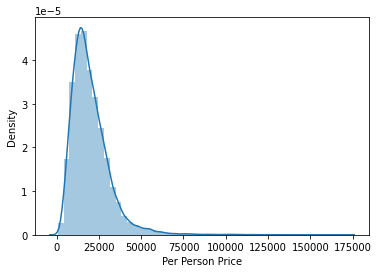

In [162]:
# Checking skewness for dependent Variable. It shows the dependent variable is 'right skewed'. 
sns.distplot(train['Per Person Price'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


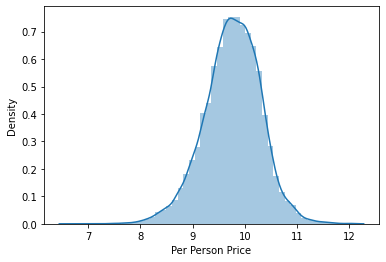

In [163]:
# Log transformed dependent variable
sns.distplot(np.log1p(train['Per Person Price']))
plt.show()

In [164]:
test_df=test.copy()

**Data Preprocessing and Feature Engineering**

In [165]:
# 'Places Covered' was similar to 'Destination' hence removed and 'Uniq Id'  was completely unique for all rows therefore did not make sense to be used
train.drop(['Places Covered', 'Uniq Id'], axis=1, inplace=True)
 
test_df.drop(['Places Covered', 'Uniq Id'], axis=1, inplace=True)

In [166]:
train[:2]

,Package Name,Package Type,Destination,Itinerary,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price
0,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,30-07-2021,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0
1,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,08-12-2021,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5


In [167]:
# Feature containing total destinations covered in a trip
train['Total Destinations Covered'] = train['Destination'].apply(lambda x: len(x.split('|')))

test_df['Total Destinations Covered'] = test_df['Destination'].apply(lambda x: len(x.split('|')))

In [168]:
train[:1]

,Package Name,Package Type,Destination,Itinerary,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price,Total Destinations Covered
0,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,30-07-2021,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0,4


In [169]:
train['Sightseeing Places Covered'].value_counts()

Not Available                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               1623
 Tata Tea Museum | Eravikulam national park                                                                                                                            

In [170]:

# Feature containing total no. of sightseeing places covered in a trip
train['Total Sightseeing Places Covered'] = train['Sightseeing Places Covered'].apply(lambda x: len(x.split('|')) if x != 'Not Available' else -1)

test_df['Total Sightseeing Places Covered'] = test_df['Sightseeing Places Covered'].apply(lambda x: len(x.split('|')) if x != 'Not Available' else -1)

In [171]:
train[:5]

,Package Name,Package Type,Destination,Itinerary,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price,Total Destinations Covered,Total Sightseeing Places Covered
0,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,30-07-2021,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0,4,-1
1,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,08-12-2021,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5,3,7
2,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,26-04-2021,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,0,4,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,12421.5,2,8
3,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,27-08-2021,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,0,5,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...,35967.0,4,9
4,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,12-12-2021,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,0,5,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,25584.0,2,2


In [172]:
train['Hotel Details']

0                                            Not Available
1        The Orchard Retreat & Spa:4.6|WelcomHotel Pine...
2             The Ananta:4.4|juSTa Lake Nahargarh Palace:4
3        Elixir Hills Suites Resort & Spa-MMT Holidays ...
4        Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...
                               ...                        
20995    Summit Thistle Villa Resort & Spa:Four|Snow Va...
20996    The Orchard Retreat & Spa:4.6|The Khyber Himal...
20997         Mount Lavinia Hotel-MMT HOLIDAYS SPECIAL:4.0
20998    Ramada by Wyndham Darjeeling Gandhi Road:4.4|T...
20999    Iceberg Hill Hotel-MMT Holidays Special:3.8|Sa...
Name: Hotel Details, Length: 21000, dtype: object

In [173]:
# Replacing some ratings in word form to respective number in 'Hotel Details'
train['Hotel Details'] = train['Hotel Details'].apply(lambda x:  x.replace('Four', '4'))
train['Hotel Details'] = train['Hotel Details'].apply(lambda x:  x.replace('One', '1'))
train['Hotel Details'] = train['Hotel Details'].apply(lambda x:  x.replace('Two', '2'))
train['Hotel Details'] = train['Hotel Details'].apply(lambda x:  x.replace('Three', '3'))
train['Hotel Details'] = train['Hotel Details'].apply(lambda x:  x.replace('Five', '5'))

test_df['Hotel Details'] = test_df['Hotel Details'].apply(lambda x:  x.replace('Four', '4'))
test_df['Hotel Details'] = test_df['Hotel Details'].apply(lambda x:  x.replace('One', '1'))
test_df['Hotel Details'] = test_df['Hotel Details'].apply(lambda x:  x.replace('Two', '2'))
test_df['Hotel Details'] = test_df['Hotel Details'].apply(lambda x:  x.replace('Three', '3'))
test_df['Hotel Details'] = test_df['Hotel Details'].apply(lambda x:  x.replace('Five', '5'))


In [174]:
train[:5]

,Package Name,Package Type,Destination,Itinerary,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price,Total Destinations Covered,Total Sightseeing Places Covered
0,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,30-07-2021,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0,4,-1
1,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,08-12-2021,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5,3,7
2,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,26-04-2021,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,0,4,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,12421.5,2,8
3,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,27-08-2021,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,0,5,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...,35967.0,4,9
4,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,12-12-2021,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,0,5,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,25584.0,2,2


In [175]:
train['Hotel Details']

0                                            Not Available
1        The Orchard Retreat & Spa:4.6|WelcomHotel Pine...
2             The Ananta:4.4|juSTa Lake Nahargarh Palace:4
3        Elixir Hills Suites Resort & Spa-MMT Holidays ...
4        Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...
                               ...                        
20995    Summit Thistle Villa Resort & Spa:4|Snow Valle...
20996    The Orchard Retreat & Spa:4.6|The Khyber Himal...
20997         Mount Lavinia Hotel-MMT HOLIDAYS SPECIAL:4.0
20998    Ramada by Wyndham Darjeeling Gandhi Road:4.4|T...
20999    Iceberg Hill Hotel-MMT Holidays Special:3.8|Sa...
Name: Hotel Details, Length: 21000, dtype: object

In [176]:
import re

In [177]:
# Using Regular Expression to obtain Average Rating of Hotels for each trip
train['Avg Rating Hotels'] = train['Hotel Details'].apply(lambda x: sum(float(i.replace(':', '')) for i in (re.findall(r'[:][0-9]*[.]?[0-9]+', x))) / len(re.findall(r'[:][0-9]*[.]?[0-9]+', x)) if len(re.findall(r'[:][0-9]*[.]?[0-9]+', x)) != 0 else -1)

test_df['Avg Rating Hotels'] = test_df['Hotel Details'].apply(lambda x: sum(float(i.replace(':', '')) for i in (re.findall(r'[:][0-9]*[.]?[0-9]+', x))) / len(re.findall(r'[:][0-9]*[.]?[0-9]+', x)) if len(re.findall(r'[:][0-9]*[.]?[0-9]+', x)) != 0 else -1)

In [178]:
train[:2]

,Package Name,Package Type,Destination,Itinerary,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price,Total Destinations Covered,Total Sightseeing Places Covered,Avg Rating Hotels
0,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,30-07-2021,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0,4,-1,-1.000000
1,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,08-12-2021,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5,3,7,4.433333


In [179]:
train['Travel Date'] = pd.to_datetime(train['Travel Date'])

In [180]:
train[:2]

,Package Name,Package Type,Destination,Itinerary,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price,Total Destinations Covered,Total Sightseeing Places Covered,Avg Rating Hotels
0,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,2021-07-30,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0,4,-1,-1.000000
1,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,2021-08-12,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5,3,7,4.433333


In [181]:
train['Itinerary']

0        1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...
1                  1N Srinagar . 2N Pahalgam . 1N Srinagar
2                              2N Udaipur . 1N Chittorgarh
3        2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...
4                                  4N Pattaya . 3N Bangkok
                               ...                        
20995                 2N Shimla . 3N Manali . 1N New Delhi
20996    1N Srinagar . 1N Gulmarg . 2N Pahalgam . 3N Sr...
20997                                           5N Colombo
20998              2N Darjeeling . 2N Pelling . 2N Gangtok
20999                  3N Munnar . 2N Kovalam . 1N Allepey
Name: Itinerary, Length: 21000, dtype: object

In [182]:
# Feature having total no. of days in respective trips
train['Total No of days'] = train['Itinerary'].apply(lambda x: sum(int(i) for i in (re.findall(r'[0-9]', x))))

test_df['Total No of days'] = test_df['Itinerary'].apply(lambda x: sum(int(i) for i in (re.findall(r'[0-9]', x))))

In [183]:
train[:2]

,Package Name,Package Type,Destination,Itinerary,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price,Total Destinations Covered,Total Sightseeing Places Covered,Avg Rating Hotels,Total No of days
0,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,2021-07-30,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0,4,-1,-1.000000,6
1,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,2021-08-12,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5,3,7,4.433333,4


In [184]:
# Dropping date features improved score
train.drop('Travel Date', axis=1, inplace=True)
test_df.drop('Travel Date', axis=1, inplace=True)

In [185]:
# Checking for null values for all columns
train.isnull().sum().sort_values(ascending=False)

Total No of days                    0
Avg Rating Hotels                   0
Total Sightseeing Places Covered    0
Total Destinations Covered          0
Per Person Price                    0
Cancellation Rules                  0
Sightseeing Places Covered          0
Meals                               0
Flight Stops                        0
Airline                             0
Start City                          0
Hotel Details                       0
Itinerary                           0
Destination                         0
Package Type                        0
Package Name                        0
dtype: int64

In [186]:
# Checking for null values for all columns
test_df.isnull().sum().sort_values(ascending=False)

Total No of days                    0
Avg Rating Hotels                   0
Total Sightseeing Places Covered    0
Total Destinations Covered          0
Cancellation Rules                  0
Sightseeing Places Covered          0
Meals                               0
Flight Stops                        0
Airline                             0
Start City                          0
Hotel Details                       0
Itinerary                           0
Destination                         0
Package Type                        0
Package Name                        0
dtype: int64

In [187]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()



# Encoding function for few catgeorical features
def label_enc(df, col, testing=False):
    if testing == False:
        df[col] = lb.fit_transform(df[col])
        
    else:
        df[col] = lb.transform(df[col])
    return df

In [188]:
cat_feature = ['Start City', 'Package Type', 'Cancellation Rules', 'Destination']

# Ordinal Encoding 'cat_feature' columns 
train= label_enc(train, cat_feature)
test_df = label_enc(test_df, cat_feature, testing=True)

ValueError: ignored

In [190]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
for col in cat_feature:
  train[col] = lb.fit_transform(train[col])

In [192]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
for col in cat_feature:
  test_df[col] = lb.fit_transform(test_df[col])

In [ ]:
for col in cat_feature:
  train[col] = oe.fit_transform(train[col])

In [ ]:
for col in cat_feature:
  test_df[col] = oe.transform(test_df[col])

In [193]:
# Ratio feature of 'Total Sightseeing Places Covered' and 'Total days'
train['Sightseeing per days'] = train['Total Sightseeing Places Covered'] / (train['Total No of days']) 

# Ratio feature of 'Total Destinations Covered' and 'Total days'
train['total destination per days'] = train['Total Destinations Covered'] / (train['Total No of days'])


test_df['Sightseeing per days'] = test_df['Total Sightseeing Places Covered'] / test_df['Total No of days']
test_df['total destination per days'] = test_df['Total Destinations Covered'] / test_df['Total No of days']

In [194]:
train[:2]

,Package Name,Package Type,Destination,Itinerary,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price,Total Destinations Covered,Total Sightseeing Places Covered,Avg Rating Hotels,Total No of days,Sightseeing per days,total destination per days
0,Best of Shimla and Manali Holiday from Delhi,4,417,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,Not Available,0,Not Available,2,3,Not Available,5,11509.0,4,-1,-1.000000,6,-0.166667,0.666667
1,Kashmir Valley vacation,3,533,1N Srinagar . 2N Pahalgam . 1N Srinagar,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,1,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,0,22485.5,3,7,4.433333,4,1.750000,0.750000


In [195]:
from sklearn.feature_extraction.text import CountVectorizer

# Extracting features from text columns using CountVectorizer
def CountVect(column, train, test):
    vect = CountVectorizer()
    
    train_feature = vect.fit_transform(train[column])
    train_feature = pd.DataFrame(train_feature.todense(), columns=[(column+str(i)) for i in range(len(vect.get_feature_names()))])
    train = pd.concat([train, train_feature], axis=1)
    
    test_feature = vect.transform(test[column])
    test_feature = pd.DataFrame(test_feature.todense(), columns=[(column+str(i)) for i in range(len(vect.get_feature_names()))])
    test = pd.concat([test, test_feature], axis=1)
    
    return train, test

In [196]:
# Calling 'CountVec' function for these columns
for column in ['Sightseeing Places Covered', 'Hotel Details', 'Package Name', 'Itinerary', 'Airline']:
    train, test_df = CountVect(column, train, test_df)

In [197]:
train[:5]

,Package Name,Package Type,Destination,Itinerary,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price,Total Destinations Covered,Total Sightseeing Places Covered,Avg Rating Hotels,Total No of days,Sightseeing per days,total destination per days,Sightseeing Places Covered0,Sightseeing Places Covered1,Sightseeing Places Covered2,Sightseeing Places Covered3,Sightseeing Places Covered4,Sightseeing Places Covered5,Sightseeing Places Covered6,Sightseeing Places Covered7,Sightseeing Places Covered8,Sightseeing Places Covered9,Sightseeing Places Covered10,Sightseeing Places Covered11,Sightseeing Places Covered12,Sightseeing Places Covered13,Sightseeing Places Covered14,Sightseeing Places Covered15,Sightseeing Places Covered16,Sightseeing Places Covered17,Sightseeing Places Covered18,Sightseeing Places Covered19,Sightseeing Places Covered20,Sightseeing Places Covered21,...,Airline23,Airline24,Airline25,Airline26,Airline27,Airline28,Airline29,Airline30,Airline31,Airline32,Airline33,Airline34,Airline35,Airline36,Airline37,Airline38,Airline39,Airline40,Airline41,Airline42,Airline43,Airline44,Airline45,Airline46,Airline47,Airline48,Airline49,Airline50,Airline51,Airline52,Airline53,Airline54,Airline55,Airline56,Airline57,Airline58,Airline59,Airline60,Airline61,Airline62
0,Best of Shimla and Manali Holiday from Delhi,4,417,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,Not Available,0,Not Available,2,3,Not Available,5,11509.0,4,-1,-1.000000,6,-0.166667,0.666667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Kashmir Valley vacation,3,533,1N Srinagar . 2N Pahalgam . 1N Srinagar,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,1,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,0,22485.5,3,7,4.433333,4,1.750000,0.750000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Might of Mewar- Udaipur and Chittorgarh,2,549,2N Udaipur . 1N Chittorgarh,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,1,IndiGo,0,4,Lake Pichola | Jag Mandir Palace | Saheliyon ...,0,12421.5,2,8,4.200000,3,2.666667,0.666667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Colorful Kerala ( Romantic Getaway ),3,329,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Elixir Hills Suites Resort & Spa-MMT Holidays ...,1,IndiGo,0,5,Mattupetty Dam | Echo Point | Tata Tea Museum...,0,35967.0,4,9,4.500000,6,1.500000,0.666667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,A Week In Bangkok & Pattaya,3,443,4N Pattaya . 3N Bangkok,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,1,Spicejet|Go Air,0,5,"Coral Island Tour with Indian Lunch, Join Spe...",0,25584.0,2,2,4.350000,7,0.285714,0.285714,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [198]:
test_df['Start City'].unique()

array([1, 0])

In [199]:
# Dropping columns after text feature extraction
train.drop(['Sightseeing Places Covered', 'Hotel Details', 'Package Name', 'Itinerary', 'Airline'], axis=1, inplace=True)

test_df.drop(['Sightseeing Places Covered', 'Hotel Details', 'Package Name', 'Itinerary', 'Airline'], axis=1, inplace=True)

In [200]:
train[:2]

,Package Type,Destination,Start City,Flight Stops,Meals,Cancellation Rules,Per Person Price,Total Destinations Covered,Total Sightseeing Places Covered,Avg Rating Hotels,Total No of days,Sightseeing per days,total destination per days,Sightseeing Places Covered0,Sightseeing Places Covered1,Sightseeing Places Covered2,Sightseeing Places Covered3,Sightseeing Places Covered4,Sightseeing Places Covered5,Sightseeing Places Covered6,Sightseeing Places Covered7,Sightseeing Places Covered8,Sightseeing Places Covered9,Sightseeing Places Covered10,Sightseeing Places Covered11,Sightseeing Places Covered12,Sightseeing Places Covered13,Sightseeing Places Covered14,Sightseeing Places Covered15,Sightseeing Places Covered16,Sightseeing Places Covered17,Sightseeing Places Covered18,Sightseeing Places Covered19,Sightseeing Places Covered20,Sightseeing Places Covered21,Sightseeing Places Covered22,Sightseeing Places Covered23,Sightseeing Places Covered24,Sightseeing Places Covered25,Sightseeing Places Covered26,...,Airline23,Airline24,Airline25,Airline26,Airline27,Airline28,Airline29,Airline30,Airline31,Airline32,Airline33,Airline34,Airline35,Airline36,Airline37,Airline38,Airline39,Airline40,Airline41,Airline42,Airline43,Airline44,Airline45,Airline46,Airline47,Airline48,Airline49,Airline50,Airline51,Airline52,Airline53,Airline54,Airline55,Airline56,Airline57,Airline58,Airline59,Airline60,Airline61,Airline62
0,4,417,0,2,3,5,11509.0,4,-1,-1.000000,6,-0.166667,0.666667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,533,1,0,5,0,22485.5,3,7,4.433333,4,1.750000,0.750000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [204]:
test_df[:2]

,Package Type,Destination,Start City,Flight Stops,Meals,Cancellation Rules,Total Destinations Covered,Total Sightseeing Places Covered,Avg Rating Hotels,Total No of days,Sightseeing per days,total destination per days,Sightseeing Places Covered0,Sightseeing Places Covered1,Sightseeing Places Covered2,Sightseeing Places Covered3,Sightseeing Places Covered4,Sightseeing Places Covered5,Sightseeing Places Covered6,Sightseeing Places Covered7,Sightseeing Places Covered8,Sightseeing Places Covered9,Sightseeing Places Covered10,Sightseeing Places Covered11,Sightseeing Places Covered12,Sightseeing Places Covered13,Sightseeing Places Covered14,Sightseeing Places Covered15,Sightseeing Places Covered16,Sightseeing Places Covered17,Sightseeing Places Covered18,Sightseeing Places Covered19,Sightseeing Places Covered20,Sightseeing Places Covered21,Sightseeing Places Covered22,Sightseeing Places Covered23,Sightseeing Places Covered24,Sightseeing Places Covered25,Sightseeing Places Covered26,Sightseeing Places Covered27,...,Airline23,Airline24,Airline25,Airline26,Airline27,Airline28,Airline29,Airline30,Airline31,Airline32,Airline33,Airline34,Airline35,Airline36,Airline37,Airline38,Airline39,Airline40,Airline41,Airline42,Airline43,Airline44,Airline45,Airline46,Airline47,Airline48,Airline49,Airline50,Airline51,Airline52,Airline53,Airline54,Airline55,Airline56,Airline57,Airline58,Airline59,Airline60,Airline61,Airline62
0,2,177,1,0,4,0,1,-1,4.1,5,-0.2,0.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,39,1,0,4,6,1,1,4.4,2,0.5,0.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [206]:
!pip install catboost

     |████████████████████████████████| 67.3MB 156kB/s 


In [208]:
!pip install category-encoders

     |████████████████████████████████| 81kB 3.6MB/s 


**Model Selection**

In [209]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LassoCV, ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.tree import DecisionTreeRegressor
from category_encoders import MEstimateEncoder
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import SVR
import lightgbm as lgb
import xgboost as xgb

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [210]:
# Separating and storing independent and dependent variable in X and y respectively
X, y = train.drop('Per Person Price', axis=1), train['Per Person Price']

In [211]:
# Stacking regressor function to ensemble LGBM and CatBoost
def get_stacking():
    level0 = [('lgbm_regressor', lgb.LGBMRegressor(n_estimators=3000, max_depth=11, learning_rate=0.06, num_leaves=40)),
               #('XGB_regressor', xgb.XGBRegressor(n_estimators=700, objective='reg:squarederror', max_depth=7, learning_rate=0.06, colsample_bytree=0.9, subsample=0.8)),
               ('catboost', CatBoostRegressor(silent=True,learning_rate=0.18, n_estimators=2000, depth=6))]
    
    level1 = LinearRegression()
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model

In [215]:
# K-Fold Cross Validation 
kf = KFold(n_splits=10, shuffle=True)
scores = []
for fold, (train_index, test_index) in enumerate(kf.split(X, y), 1):
    X_train = X.iloc[train_index]
    X_train = ordinal_enc(X_train, cat_feature)
    
    y_train = np.log1p(y.iloc[train_index])
    
    X_test = X.iloc[test_index]
    #X_test = label_enc(X_test, cat_feature, testing=True)
    for col in cat_feature:
      X_test[col] = lb.fit_transform(X_test[col])

    y_test = y.iloc[test_index]
    
    #model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.03)
    #model = RandomForestRegressor(n_estimators=200, n_jobs=-1)
    #model = ElasticNet()
    model = lgb.LGBMRegressor(n_estimators=2500, max_depth=11, learning_rate=0.05, num_leaves=40)
    #model = xgb.XGBRegressor(n_estimators=590, objective='reg:squarederror', max_depth=7, learning_rate=0.06, min_child_weight=1.2)
    #model = get_stacking()
    #model = ExtraTreesRegressor(n_estimators=500, bootstrap=True, n_jobs=-1)
    #model = LinearRegression()
    #model = KNeighborsRegressor(weights='distance', n_neighbors=15)
    #model = CatBoostRegressor(silent=True,learning_rate=0.18, n_estimators=1700, depth=6)
    model.fit(X_train, y_train)
    
    pred = model.predict(X_test)
 
    score = np.sqrt(mean_squared_log_error(y_test, np.expm1((pred))))
    print(f'RMSLE score for fold {fold} is {score}')
    scores.append(score)

print(f'Mean RMSLE score is {np.mean(scores)}')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

RMSLE score for fold 1 is 0.15811726539764967


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

RMSLE score for fold 2 is 0.16690464250512665


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

RMSLE score for fold 3 is 0.16488707011400952


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

RMSLE score for fold 4 is 0.15950924266385214


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

RMSLE score for fold 5 is 0.15907849475160085


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

RMSLE score for fold 6 is 0.15848358287216505


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

RMSLE score for fold 7 is 0.15852919015147235


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

RMSLE score for fold 8 is 0.14971873571317704


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

RMSLE score for fold 9 is 0.1702129305098891


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

RMSLE score for fold 10 is 0.17001610716001853
Mean RMSLE score is 0.16154572618389612


In [216]:
# Stack Model 
model = get_stacking()

In [217]:
model

StackingRegressor(cv=5,
                  estimators=[('lgbm_regressor',
                               LGBMRegressor(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.06, max_depth=11,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=3000, n_jobs=-1,
                                             num_leaves=40, objective=None,
                                             random_state=None, reg_alpha=0.0,
                                             reg_lambda=0.0, silent=True,
                                             subsample=1.0,
               

In [218]:
# Log transforming Target Variable before training
yn = np.log1p(y)

# Model Training
model.fit(X, yn)

StackingRegressor(cv=5,
                  estimators=[('lgbm_regressor',
                               LGBMRegressor(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.06, max_depth=11,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=3000, n_jobs=-1,
                                             num_leaves=40, objective=None,
                                             random_state=None, reg_alpha=0.0,
                                             reg_lambda=0.0, silent=True,
                                             subsample=1.0,
               

In [219]:
# Making Predictions and using 'expm1' to convert it back to original form
sub = pd.DataFrame(np.expm1(model.predict(test_df)), columns=['Per Person Price'])

In [220]:
# Saving Predictions
sub.to_csv('sub_stacked_lgb_cat_lin.csv', index=False)

In [221]:
sub

,Per Person Price
0,19451.188380
1,12008.040589
2,5371.098035
3,7241.897129
4,21366.222436
...,...
8995,11962.081121
8996,16054.134932
8997,16399.640490
8998,21135.301986
